# Rapid, systematic updating of movement by accumulated decision evidence

This Notebook provides a quick way to reproduce all figures from the paper:

<i>Rapid, systematic updating of movement by accumulated decision evidence</i>

[Molano-Mazón et al. 2024 Nature Communications]()

## Imports

In [1]:
# import packages/python scripts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib
import seaborn as sns
import sys
import warnings
import os
warnings.filterwarnings('ignore')

# append the path of the python scripts
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")
    sys.path.append(module_path+"\\figures")

# load python scripts
import figures_paper as fp
import extended_ddm_v2 as edd2
import figure_1 as fig_1
import figure_2 as fig_2
import figure_3 as fig_3
import figure_4 as fig_4
import figure_6 as fig_6
import figure_7 as fig_7

# tune font size
matplotlib.rcParams['font.size'] = 11
plt.rcParams['legend.title_fontsize'] = 10.5
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['ytick.labelsize']= 10
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['lines.markersize'] = 3

# ---GLOBAL VARIABLES
figs_folder = module_path + '/figs/'  # path of figures added to the panels
RAT_COM_IMG = figs_folder + 'image_com.png'
SV_FOLDER = '...'  # path where the figures will be saved in .png and .svg
DATA_FOLDER = '...'  # path where rat data is saved
HUMAN_DATA_FOLDER = '...'  # path where the folder "human_data" conaining all the data is located:
RAT_noCOM_IMG = figs_folder + 'screenShot230120.png'
TASK_IMG = figs_folder + 'panel_a.png'
PCOM_RT_IMG = figs_folder + 'pcom_rt.png'
HUMAN_TASK_IMG = figs_folder + 'human_panel_a.png'
REPALT_IMG = figs_folder + 'repalt.png'
ST_CARTOON_IMG = figs_folder + 'st_cartoon_violins.png'

## Load data

In [2]:
# rat subjects
subjects = ['LE42', 'LE43', 'LE38', 'LE39', 'LE85', 'LE84', 'LE45',
            'LE40', 'LE46', 'LE86', 'LE47', 'LE37', 'LE41', 'LE36', 'LE44']
# CoM threshold
com_threshold = 8

Load data and define main variables

In [3]:
df_all = pd.DataFrame()
for sbj in subjects:
    df = edd2.get_data_and_matrix(dfpath=DATA_FOLDER + sbj, return_df=True,
                                    after_correct=True, silent=True, all_trials=True,
                                    srfail=True)
    df_all = pd.concat((df_all, df), ignore_index=True)
df = df_all
del df_all
zt = np.nansum(df[["dW_lat", "dW_trans"]].values, axis=1)  # prior
df['allpriors'] = zt
hit = np.array(df['hithistory'])  #hit, 1 if correct, 0 if incorrect
stim = np.array([stim for stim in df.res_sound])  # stim, in frames of 50 ms, structure: N trials x 20 frames
coh = np.array(df.coh2)  # putative coherence [-1, -0.5, -0.25, 0, 0.25, 0.5, 1]
decision = np.array(df.R_response) * 2 - 1  # decision, 1 if right, 0 if left
traj_stamps = df.trajectory_stamps.values  # time index of the trajectory points
traj_y = df.trajectory_y.values  # trajectory y(t)
fix_onset = df.fix_onset_dt.values  # value in time of the fixation onset
fix_breaks = np.vstack(np.concatenate([df.sound_len/1000,
                                        np.concatenate(df.fb.values)-0.3]))  #all reaction times including fixation breaks (RT<0)
sound_len = np.array(df.sound_len)  # reaction time (RT) without fixation breaks
gt = np.array(df.rewside) * 2 - 1  # ground truth, 1 if right, -1 if left
trial_index = np.array(df.origidx)  # integer from 1 to trial at end of session
resp_len = np.array(df.resp_len)  # movement time (MT)
time_trajs = edd2.get_trajs_time(resp_len=resp_len,
                                 traj_stamps=traj_stamps,
                                 fix_onset=fix_onset, com=None,
                                 sound_len=sound_len)  # to extract the timing of each timepoint of the trajectories
special_trial = df.special_trial  # 0 if normal, 2 if silent
df['time_trajs'] = time_trajs
subjid = df.subjid.values  # subject name
print('Computing CoMs')
time_com, peak_com, com =\
    fig_3.com_detection(df=df, data_folder=DATA_FOLDER,
                        com_threshold=com_threshold)  # compute CoMs given y(t) and a threshold
print('Ended Computing CoMs')
com = np.array(com)  # new CoM list, True if CoM, False if non-CoM
df['CoM_sugg'] = com
df['norm_allpriors'] = fp.norm_allpriors_per_subj(df)  # normalize prior by max value for each subject
df['time_trajs'] = time_trajs

Loading data
Loading data
Loading data
Loading data
Loading data
Loading data
Loading data
Loading data
Loading data
Loading data
Loading data
Loading data
Loading data
Loading data
Loading data
Computing CoMs
Ended Computing CoMs


### Figure 1


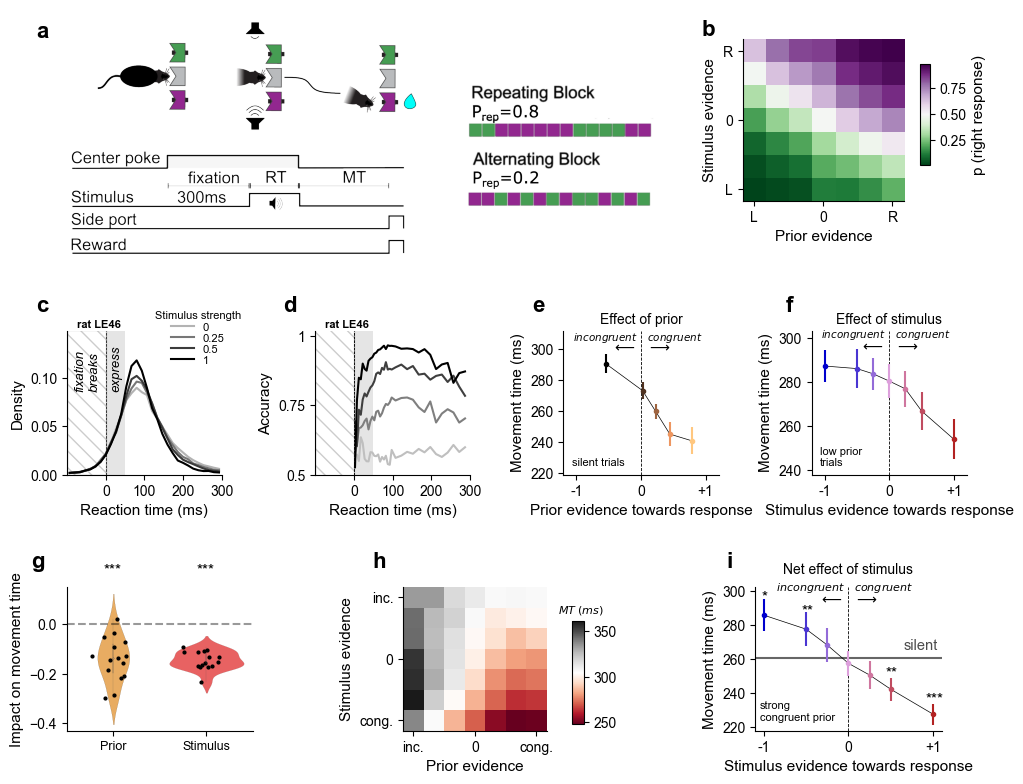

In [4]:
fig_1.fig_1_rats_behav(df_data=df, task_img=TASK_IMG, sv_folder=SV_FOLDER,
                        repalt_img=REPALT_IMG)

### Figure 2

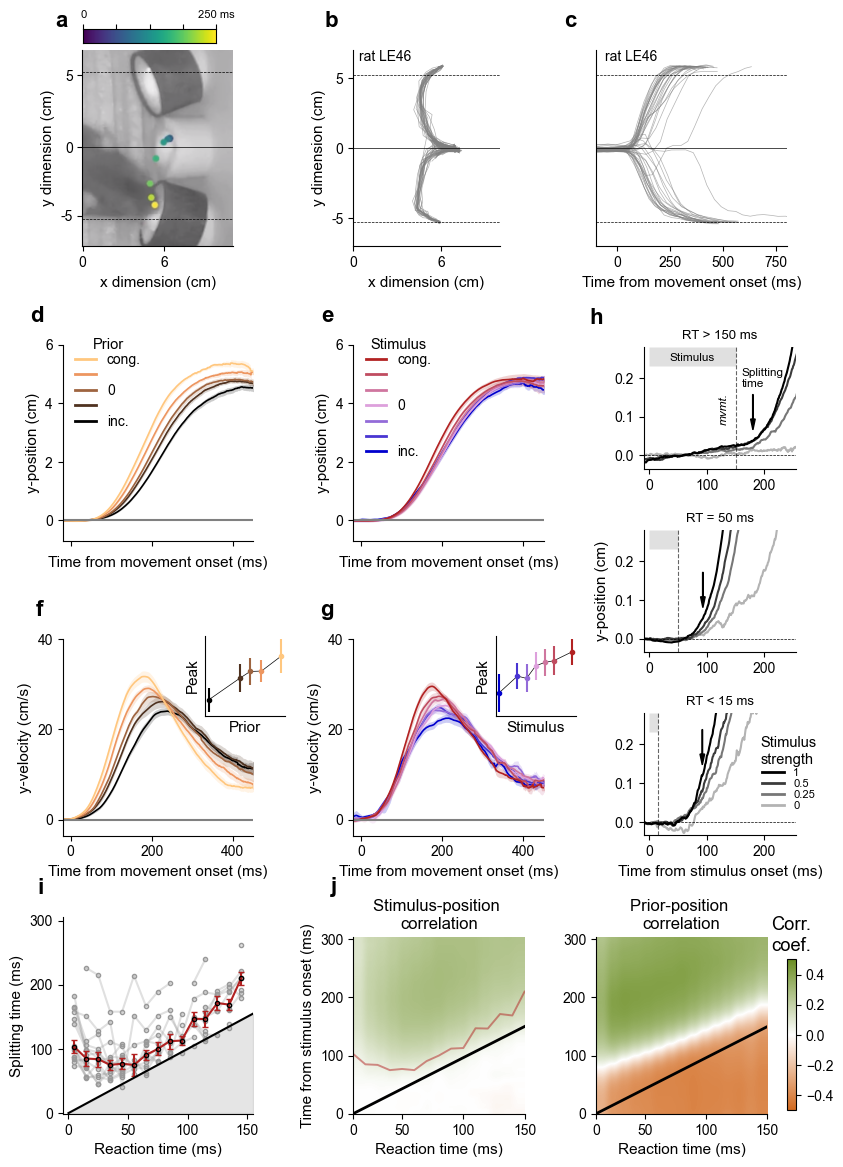

In [5]:
fig_2.fig_2_trajs(df=df.loc[df.soundrfail == 0], data_folder=DATA_FOLDER,
                  sv_folder=SV_FOLDER, rat_nocom_img=RAT_noCOM_IMG,
                  st_cartoon_img=ST_CARTOON_IMG)

### Figure 3

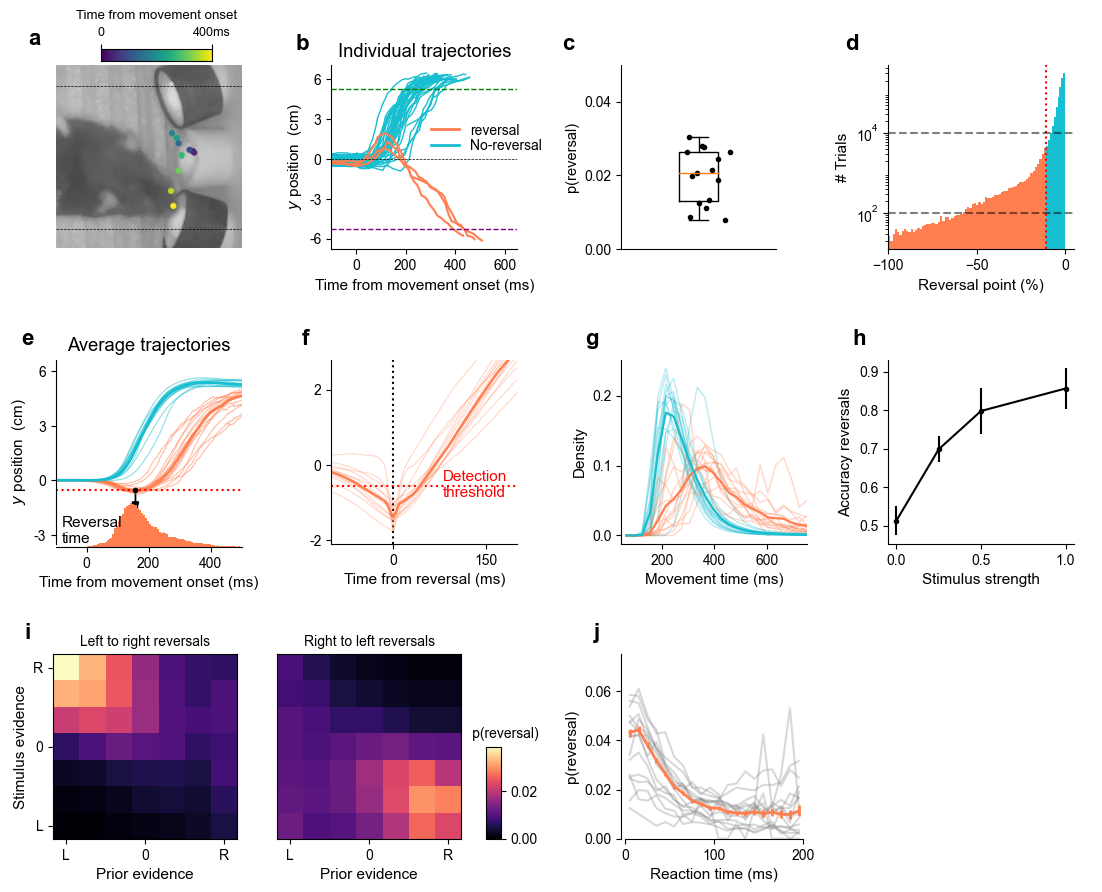

In [6]:
fig_3.fig_3_CoMs(df=df, sv_folder=SV_FOLDER, data_folder=DATA_FOLDER,
                     rat_com_img=RAT_COM_IMG)

### Figure 4

-----------
general_traj_all
14
[ 1.  4.  6.  7.  8. 10. 12. 13. 14. 15. 16. 17. 18. 21.]
[1785, 1675, 1604, 1557, 1725, 1489, 2575, 1645, 1794, 1446, 1449, 1816, 1655, 1666]


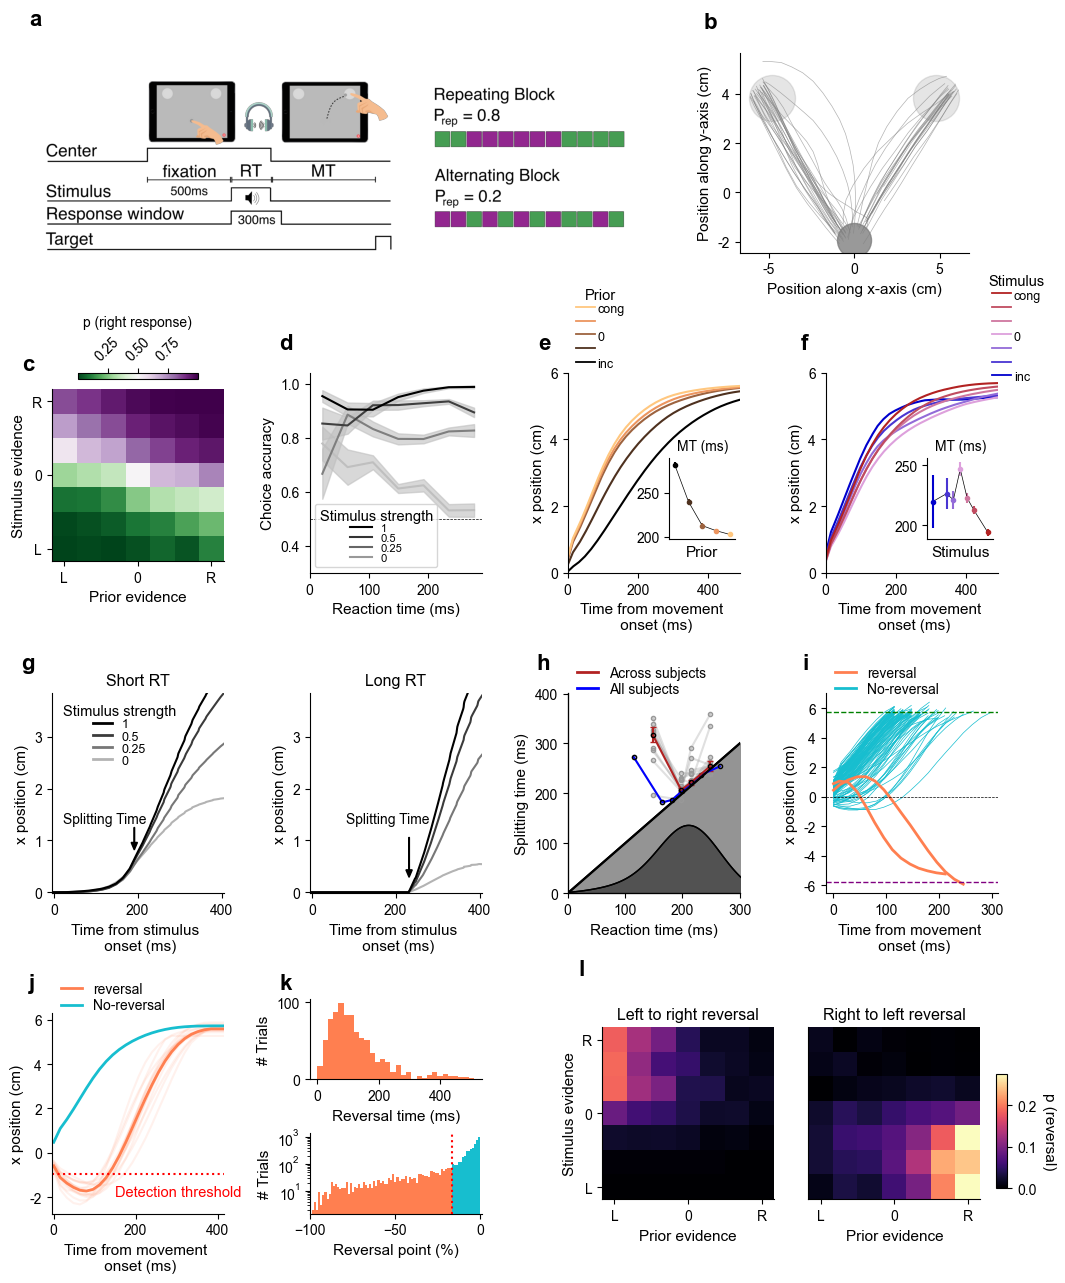

In [7]:
fig_4.fig_4_humans(folder=HUMAN_DATA_FOLDER, sv_folder=SV_FOLDER,
                    human_task_img=HUMAN_TASK_IMG, max_mt=1000, nm='300')

### Simulations and Figure 6

In [8]:
extra_label = ""  # to identify saved simulations
stim[df.soundrfail, :] = 0  # stimulus set to 0 when there was a hardware problem (failure in reproducing stimulus)
simulate = False  # if true, simulates even if there are simulations saved with extra_label name (overwrite)
# if false, doesn't simulate unless there aren't simulations saved with extra_label name
num_tr = int(len(df))
if stim.shape[0] != 20:
        stim = stim.T
print('Start simulating each rat with the corresponding parameters or Load already simmulated data')
hit_model, reaction_time, com_model_detected, resp_fin, com_model,\
            _, trajs, x_val_at_updt =\
            fp.run_simulation_different_subjs(stim=stim, zt=zt, coh=coh, gt=gt,
                                              trial_index=trial_index, num_tr=num_tr,
                                              subject_list=subjects, subjid=subjid, simulate=simulate,
                                              extra_label=extra_label)

Start simulating each rat with the corresponding parameters or Load already simmulated data
Number of trials: 71147
Number of trials: 148123
Number of trials: 66873
Number of trials: 88197
Number of trials: 14046
Number of trials: 42427
Number of trials: 132107
Number of trials: 79779
Number of trials: 111809
Number of trials: 29167
Number of trials: 132790
Number of trials: 97227
Number of trials: 54996
Number of trials: 66119
Number of trials: 147926


In [9]:
# build df_sim from simulated data
MT = [len(t) for t in trajs]
df_sim = pd.DataFrame({'coh2': coh, 'avtrapz': coh, 'trajectory_y': trajs,
                    'sound_len': reaction_time,
                    'rewside': (gt + 1)/2,
                    'R_response': (resp_fin+1)/2,
                    'resp_len': np.array(MT)*1e-3})
df_sim['CoM_sugg'] = com_model.astype(bool)
df_sim['traj_d1'] = [np.diff(t) for t in trajs]
df_sim['aftererror'] = np.array(df.aftererror)[:int(num_tr)]
df_sim['subjid'] = subjid
df_sim['origidx'] = trial_index
df_sim['special_trial'] = special_trial
df_sim['traj'] = df_sim['trajectory_y']
df_sim['com_detected'] = com_model_detected.astype(bool)
df_sim['peak_com'] = np.array(x_val_at_updt)
df_sim['hithistory'] = np.array(resp_fin == gt)
df_sim['soundrfail'] = df.soundrfail.values[:int(num_tr)]
df_sim['allpriors'] = zt
df_sim['norm_allpriors'] = fp.norm_allpriors_per_subj(df_sim)
df_sim['normallpriors'] = df_sim['norm_allpriors']
df_sim['framerate'] = 200
df_sim['res_sound'] = [st for st in stim.T]

In [10]:
# take fixation breaks out
df_sim = df_sim.loc[df_sim.sound_len.values >= 0]

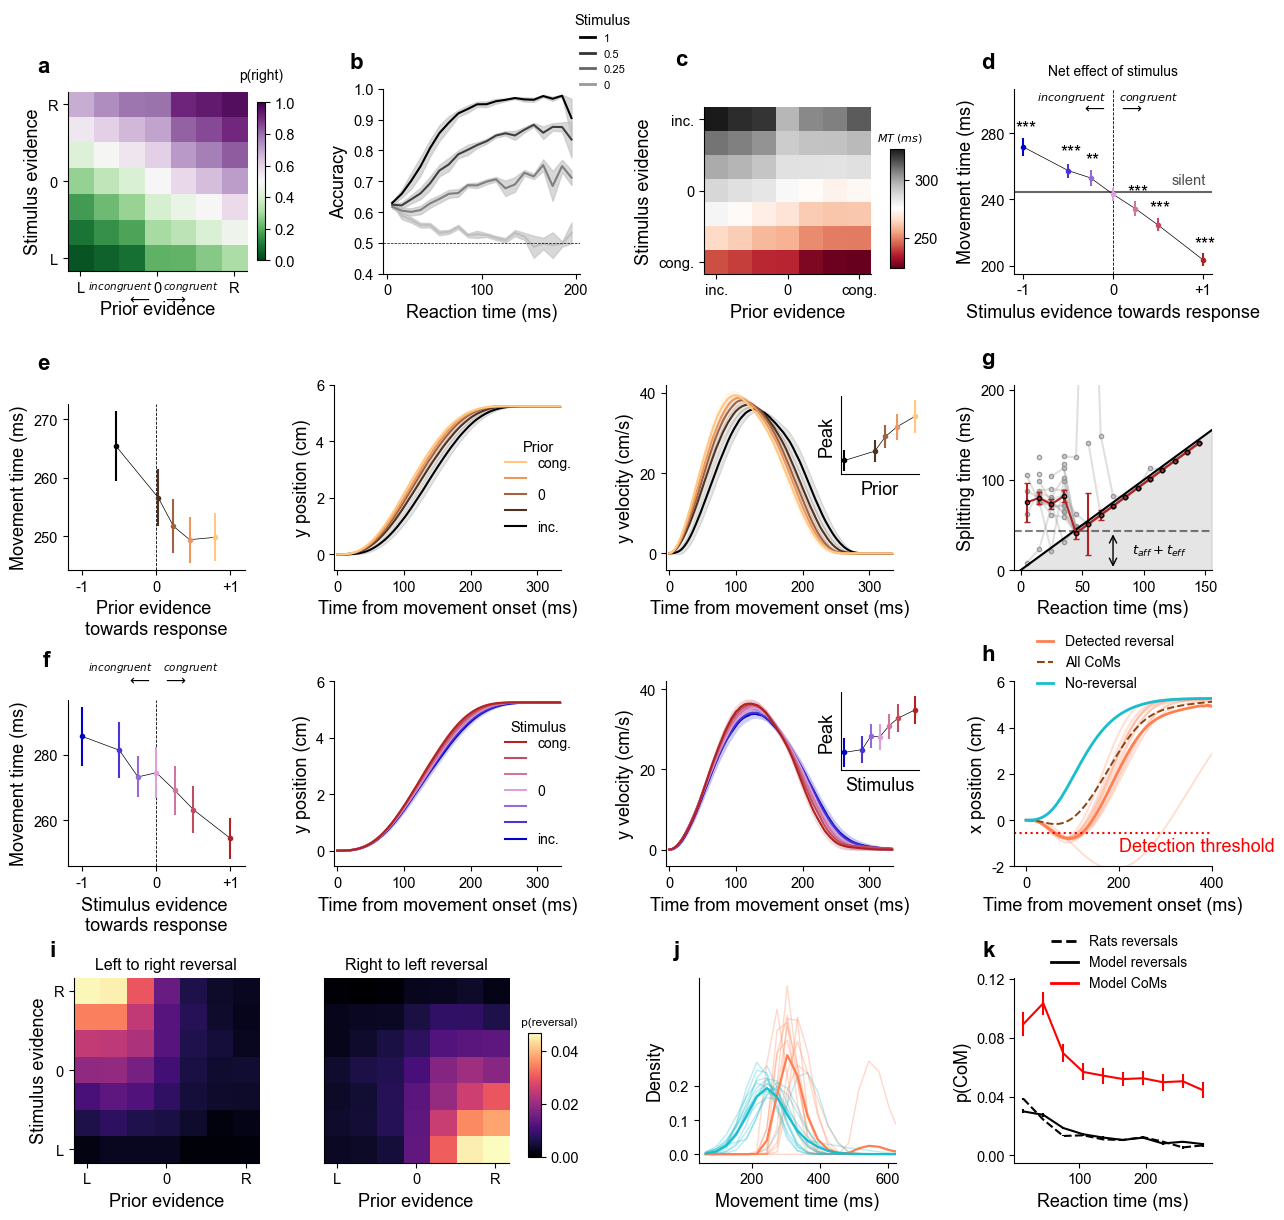

In [11]:
# save_new_data: bool, wether saving data for plots or not
save_new_data = True
fig_6.fig_6_model(sv_folder=SV_FOLDER, data_folder=DATA_FOLDER,
                  new_data=simulate, save_new_data=save_new_data,
                  coh=coh, sound_len=sound_len, zt=zt,
                  hit_model=hit_model, sound_len_model=reaction_time.astype(int),
                  decision_model=resp_fin, com=com, com_model=com_model,
                  com_model_detected=com_model_detected, df_sim=df_sim, extra_label=extra_label)

### Figure 7

Loading data
Loading data
Loading data
Number of trials: 226217
Number of trials: 0
Number of trials: 0
Number of trials: 226217
Number of trials: 0
Number of trials: 0
Number of trials: 226217
Number of trials: 0
Number of trials: 0
Number of trials: 226217
Number of trials: 0
Number of trials: 0


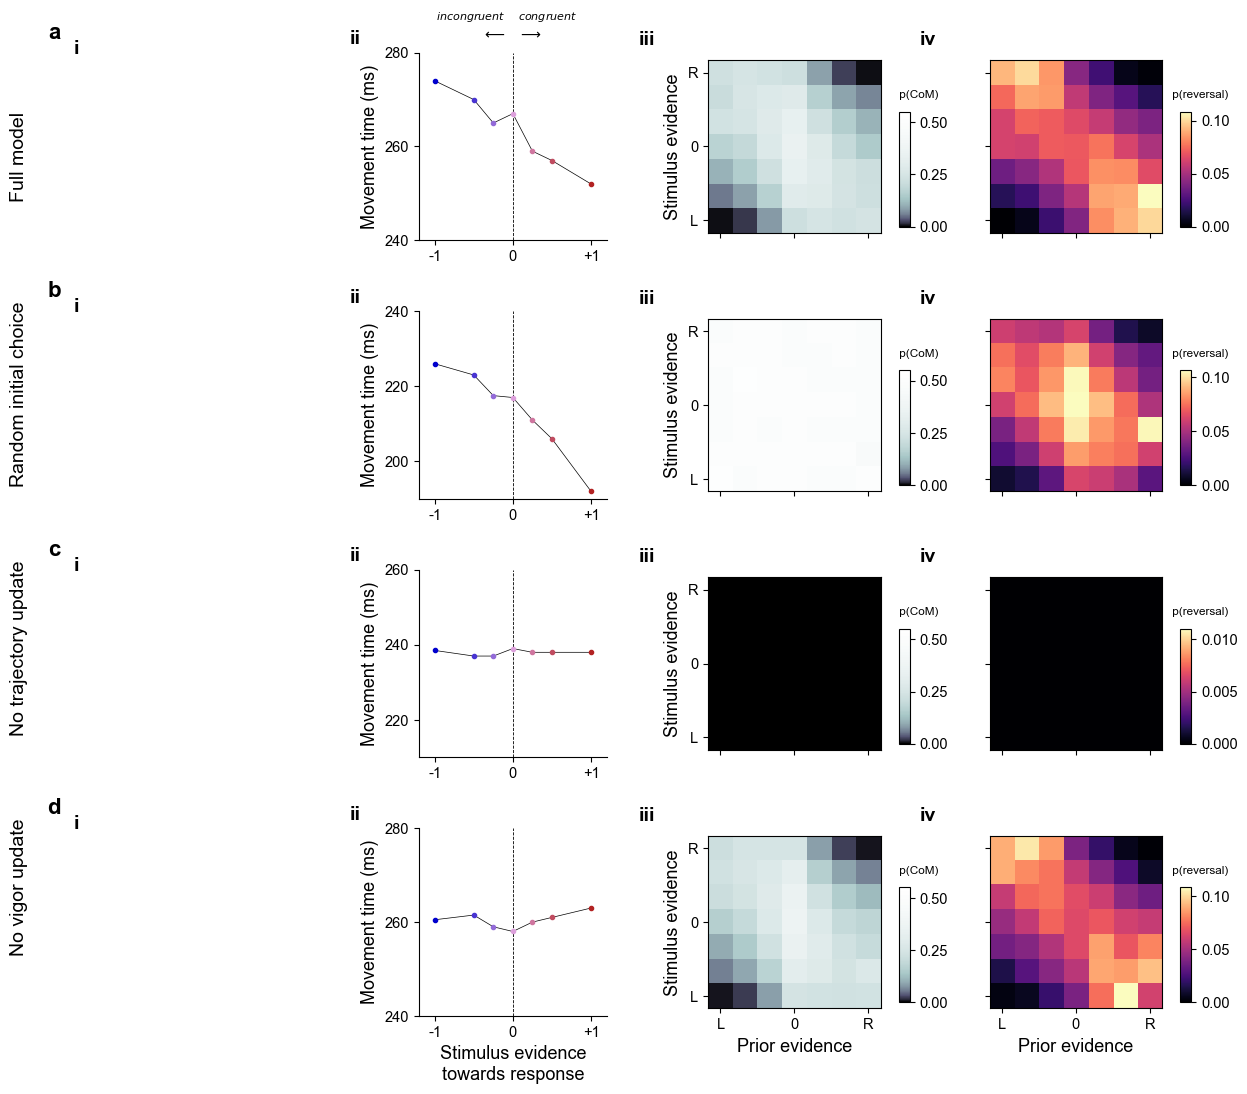

In [12]:
# take data from 3 rats, to get many different experimental conditions (stimulus, zt, trial_index):
subjects = ['LE42', 'LE38', 'LE39']
df_all = pd.DataFrame()
for sbj in subjects:
    df_7 = edd2.get_data_and_matrix(dfpath=DATA_FOLDER + sbj, return_df=True,
                                    after_correct=True,
                                    silent=True, all_trials=True,
                                    srfail=True)
    df_all = pd.concat((df_all, df_7), ignore_index=True)
df_7 = df_all
del df_all
zt = np.nansum(df_7[["dW_lat", "dW_trans"]].values, axis=1)
df_7['allpriors'] = zt
hit = np.array(df_7['hithistory'])
stim = np.array([stim for stim in df_7.res_sound]).T
coh = np.array(df_7.coh2)
gt = np.array(df_7.rewside) * 2 - 1
trial_index = np.array(df_7.origidx)
special_trial = df_7.special_trial
df_7['subjid'] = 'LE42' # change to rat LE42 so that simulations are done with the same parameters
subjid = df_7.subjid.values
fig_7.fig_7(subjects, subjid, stim, zt, coh, gt, trial_index,
                    special_trial,
                    data_folder=DATA_FOLDER, sv_folder=SV_FOLDER,
                    extra_labels=[len(coh),
                                   '_2_ro_rand_'+str(len(coh)),
                                   '_1_ro_'+str(len(coh)),
                                  '_1_ro__com_modulation_'+str(len(coh)),
                                  ])